In [207]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [208]:
def set_win_team_id(a, b, c):
    if c == 1:
        return a
    else:
        return b
    
def set_win_or_lose(a, b):
    if a == b:
        return 1
    else:
        return 0

def set_home_or_visitor(a, b):
    if a == b:
        return 'HOME'
    else:
        return 'VISITOR'
    
def set_fg3a_level(a):
    if a <= 0.25:
        return 1
    elif a <= 0.35:
        return 2
    else:
        return 3

In [209]:
#import two tables of games and game details which contain detailed information about each game and each playe
games = pd.read_csv('games.csv')
games.head(5)

,GAME_DATE_EST,GAME_ID,GAME_STATUS_TEXT,HOME_TEAM_ID,VISITOR_TEAM_ID,SEASON,TEAM_ID_home,PTS_home,FG_PCT_home,FT_PCT_home,...,AST_home,REB_home,TEAM_ID_away,PTS_away,FG_PCT_away,FT_PCT_away,FG3_PCT_away,AST_away,REB_away,HOME_TEAM_WINS
0,2020-03-01,21900895,Final,1610612766,1610612749,2019,1610612766,85.0,0.354,0.900,...,22.0,47.0,1610612749,93.0,0.402,0.762,0.226,20.0,61.0,0
1,2020-03-01,21900896,Final,1610612750,1610612742,2019,1610612750,91.0,0.364,0.400,...,19.0,57.0,1610612742,111.0,0.468,0.632,0.275,28.0,56.0,0
2,2020-03-01,21900897,Final,1610612746,1610612755,2019,1610612746,136.0,0.592,0.805,...,25.0,37.0,1610612755,130.0,0.505,0.650,0.488,27.0,37.0,1
3,2020-03-01,21900898,Final,1610612743,1610612761,2019,1610612743,133.0,0.566,0.700,...,38.0,41.0,1610612761,118.0,0.461,0.897,0.263,24.0,36.0,1
4,2020-03-01,21900899,Final,1610612758,1610612765,2019,1610612758,106.0,0.407,0.885,...,18.0,51.0,1610612765,100.0,0.413,0.667,0.429,23.0,42.0,1


In [210]:
games_details = pd.read_csv('games_details.csv')
games_details.head(5)

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,START_POSITION,COMMENT,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,21900895,1610612749,MIL,Milwaukee,202083,Wesley Matthews,F,NaN,27:08,3.0,...,4.0,4.0,8.0,2.0,2.0,0.0,0.0,0.0,8.0,11.0
1,21900895,1610612749,MIL,Milwaukee,203507,Giannis Antetokounmpo,F,NaN,34:55,17.0,...,2.0,18.0,20.0,6.0,1.0,0.0,3.0,2.0,41.0,22.0
2,21900895,1610612749,MIL,Milwaukee,201572,Brook Lopez,C,NaN,26:25,4.0,...,2.0,5.0,7.0,0.0,0.0,3.0,0.0,2.0,16.0,16.0
3,21900895,1610612749,MIL,Milwaukee,1628978,Donte DiVincenzo,G,NaN,27:35,1.0,...,1.0,6.0,7.0,5.0,0.0,1.0,2.0,0.0,2.0,14.0
4,21900895,1610612749,MIL,Milwaukee,202339,Eric Bledsoe,G,NaN,22:17,2.0,...,1.0,0.0,1.0,2.0,1.0,0.0,3.0,2.0,4.0,6.0


In [211]:
# the variables associated with the 3-pointer and the outcome in the original data are selected；a new table is merged for analysis
games['WIN_TEAM_ID'] = games.apply(lambda x:set_win_team_id(x.HOME_TEAM_ID, x.VISITOR_TEAM_ID, x.HOME_TEAM_WINS), axis = 1)
#HOME_TEAM_ID=a,VISITOR_TEAM_ID=b,HOME_TEAM_WINS=c
games_details_needed = games_details[['GAME_ID', 'TEAM_ID', 'FGM', 'FGA','FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'PTS','REB','OREB','DREB']]
games_details_new = pd.merge(games_details_needed, games[['SEASON', 'GAME_ID','HOME_TEAM_ID', 'VISITOR_TEAM_ID', 'WIN_TEAM_ID']],on='GAME_ID',how='left',left_index=True)
games_details_new.head(5)

,GAME_ID,TEAM_ID,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,PTS,REB,OREB,DREB,SEASON,HOME_TEAM_ID,VISITOR_TEAM_ID,WIN_TEAM_ID
0,21900895,1610612749,3.0,11.0,0.273,2.0,7.0,0.286,8.0,8.0,4.0,4.0,2019,1610612766,1610612749,1610612749
0,21900895,1610612749,17.0,28.0,0.607,1.0,4.0,0.250,41.0,20.0,2.0,18.0,2019,1610612766,1610612749,1610612749
0,21900895,1610612749,4.0,11.0,0.364,1.0,5.0,0.200,16.0,7.0,2.0,5.0,2019,1610612766,1610612749,1610612749
0,21900895,1610612749,1.0,5.0,0.200,0.0,3.0,0.000,2.0,7.0,1.0,6.0,2019,1610612766,1610612749,1610612749
0,21900895,1610612749,2.0,8.0,0.250,0.0,1.0,0.000,4.0,1.0,1.0,0.0,2019,1610612766,1610612749,1610612749


In [212]:
# use Groupby to find the sum of the various points of each team in each game
games_3fg = games_details_new.groupby(['GAME_ID','SEASON','TEAM_ID','WIN_TEAM_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID'],as_index=False)['PTS','FG3M','FGM','FG3A','FGA','REB','OREB','DREB'].sum()
games_3fg.head()

<ipython-input-212-feb447467248>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  games_3fg = games_details_new.groupby(['GAME_ID','SEASON','TEAM_ID','WIN_TEAM_ID', 'HOME_TEAM_ID', 'VISITOR_TEAM_ID'],as_index=False)['PTS','FG3M','FGM','FG3A','FGA','REB','OREB','DREB'].sum()


,GAME_ID,SEASON,TEAM_ID,WIN_TEAM_ID,HOME_TEAM_ID,VISITOR_TEAM_ID,PTS,FG3M,FGM,FG3A,FGA,REB,OREB,DREB
0,10300001,2003,1610612742,1610612762,1610612762,1610612742,85.0,2.0,34.0,8.0,76.0,38.0,12.0,26.0
1,10300001,2003,1610612762,1610612762,1610612762,1610612742,90.0,1.0,32.0,7.0,70.0,41.0,9.0,32.0
2,10300002,2003,1610612749,1610612763,1610612763,1610612749,94.0,2.0,32.0,13.0,75.0,43.0,11.0,32.0
3,10300002,2003,1610612763,1610612763,1610612763,1610612749,105.0,4.0,40.0,15.0,81.0,48.0,14.0,34.0
4,10300003,2003,1610612739,1610612739,1610612765,1610612739,100.0,4.0,38.0,6.0,77.0,52.0,12.0,40.0


In [213]:
# chech win or lose
games_3fg['WIN_OR_LOSE'] = games_3fg.apply(lambda x:set_win_or_lose(x.TEAM_ID,x.WIN_TEAM_ID), axis=1)

In [214]:
# check the win team is home team or visitor team
games_3fg['HOME_OR_VISITOR'] = games_3fg.apply(lambda x:set_home_or_visitor(x.TEAM_ID,x.HOME_TEAM_ID), axis=1)

In [215]:
#三分球出手率 FG3A_ratio = FG3A (3-Point Field Goal Attempts) / FGA (Field Goal Attempts)
games_3fg['FG3A_ratio'] = games_3fg['FG3A'] / games_3fg['FGA']
#divide the 3-point attempts rates (FG3A_ratio) into three intervals (FG3A_level)
games_3fg['FG3A_level'] = games_3fg.apply(lambda x:set_fg3a_level(x.FG3A_ratio),axis=1)

In [216]:
# 对方后手篮板 OPPONENT_DREB = sum_DREB - DREB (Defensive Rebounds)
sum_DREB = pd.DataFrame(games_3fg.groupby(['GAME_ID'],as_index=False)['DREB'].sum())
sum_DREB.columns = ['GAME_ID', 'sum_DREB']
games_3fg = pd.merge(games_3fg,sum_DREB,on='GAME_ID',how='left',left_index=True)
games_3fg['OPPONENT_DREB'] = games_3fg['sum_DREB'] - games_3fg['DREB']

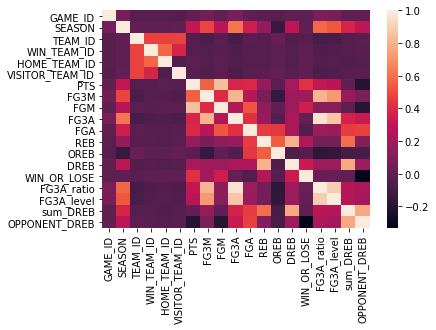

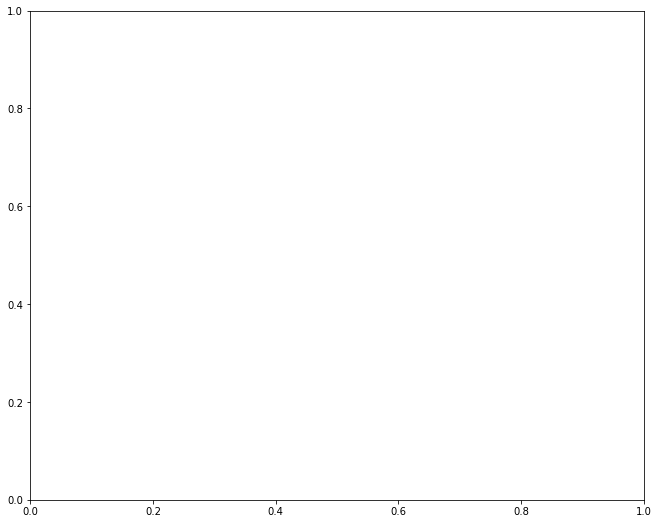

In [217]:
# Heatmap of the correlations between FG3A and OPPONENT_DREB
games_3fg.drop(['GAME_ID', 'SEASON','TEAM_ID','WIN_TEAM_ID','HOME_TEAM_ID','VISITOR_TEAM_ID'], axis=1)
game=games_3fg.drop(['GAME_ID', 'SEASON','TEAM_ID','WIN_TEAM_ID','HOME_TEAM_ID','VISITOR_TEAM_ID'], axis=1)
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(games_3fg.corr())
f, ax = plt.subplots(figsize=(11, 9))

In [218]:
games_3fg_season_result = games_3fg.groupby(['SEASON','FG3A_level'], as_index=False)['OPPONENT_DREB'].mean()
games_3fg_season_result.to_csv('games_3fg_season_result.csv',header=True)
games_3fg_season_result.head(6)

,SEASON,FG3A_level,OPPONENT_DREB
0,2003,1,29.989696
1,2003,2,30.879310
2,2003,3,31.225806
3,2004,1,29.710390
4,2004,2,29.998077
5,2004,3,29.909091


In [219]:
games_3fg_season_result=games_3fg_season_result.pivot(index='SEASON',columns='FG3A_level',values='OPPONENT_DREB')
games_3fg_season_result.head(5)

FG3A_level,1,2,3
SEASON,,,
2003,29.989696,30.879310,31.225806
2004,29.710390,29.998077,29.909091
2005,29.412419,30.579779,32.216216
2006,29.639296,30.532164,30.611111
2007,30.458955,31.284848,30.942149


In [220]:
# the relationship between the number of FG3A taken at home and away and the number of OPPONENT_DREB
games_3fg_home_visit_result = games_3fg.groupby(['HOME_OR_VISITOR','FG3A_level'],  as_index=False)['OPPONENT_DREB'].mean()
games_3fg_home_visit_result.to_csv('games_3fg_home_visit_result.csv',header=True)
games_3fg_home_visit_result.head(6)

,HOME_OR_VISITOR,FG3A_level,OPPONENT_DREB
0,HOME,1,30.103997
1,HOME,2,31.708284
2,HOME,3,33.229132
3,VISITOR,1,31.101253
4,VISITOR,2,32.674327
5,VISITOR,3,34.207084


In [221]:
#FG3_PTS_ratio = FG3M (3-Point Field Goals Made) / PTS (Points)
games_3fg['FG3_PTS_ratio'] = games_3fg['FG3M'] * 3 / games_3fg['PTS']
# FG3A_ratio = FG3A (3-Point Field Goal Attempts) / FGA (Field Goal Attempts)
games_3fg['FG3A_ratio'] = games_3fg['FG3A'] / games_3fg['FGA']
# FG3M_PCT (3-Point Field Goal Percentage) = FG3M (3-Point Field Goals Made) / FG3A(3-Point Field Goal Attempts) 
games_3fg['FG3M_PCT'] = games_3fg['FG3M'] / games_3fg['FG3A']
games_3fg.dropna(axis=0, how='any', inplace=True)

In [222]:
# 3-point attempts rate upward trend
SEASON_FG3A_level = pd.DataFrame(games_3fg.groupby(['SEASON'],as_index=False)['TEAM_ID'].count())
SEASON_FG3A_level_count = pd.DataFrame(games_3fg.groupby(['SEASON', 'FG3A_level'],as_index=False)['TEAM_ID'].count())
SEASON_FG3A_level = pd.merge(SEASON_FG3A_level, SEASON_FG3A_level_count, on='SEASON',how='left',left_index=True)
SEASON_FG3A_level['LEVEL_RTO'] = SEASON_FG3A_level['TEAM_ID_y'] / SEASON_FG3A_level['TEAM_ID_x']
SEASON_FG3A_level.to_csv('SEASON_FG3A_level.csv',header=True)

In [223]:
#winning percentage corresponding to the 3-point attempts
SEASON_FG3A_game = pd.DataFrame(games_3fg.groupby(['SEASON', 'FG3A_level', 'WIN_OR_LOSE'],as_index=False)['TEAM_ID'].count())
SEASON_FG3A_level = pd.merge(SEASON_FG3A_level, SEASON_FG3A_game, on=['SEASON','FG3A_level'],how='left',left_index=True)
SEASON_FG3A_level['WIN_RTO'] = SEASON_FG3A_level[SEASON_FG3A_level['WIN_OR_LOSE'] == 1]['TEAM_ID']/SEASON_FG3A_level[SEASON_FG3A_level['WIN_OR_LOSE'] == 1]['TEAM_ID_y']
SEASON_FG3A_level.dropna(axis=0, how='any', inplace=True)
SEASON_FG3A_level = SEASON_FG3A_level[['SEASON', 'FG3A_level', 'WIN_RTO']]
SEASON_FG3A_level=SEASON_FG3A_level.pivot(index='SEASON',columns='FG3A_level',values='WIN_RTO')
SEASON_FG3A_level.to_csv('SEASON_FG3A_level_win_rto.csv',header=True)
SEASON_FG3A_level.head()

FG3A_level,1,2,3
SEASON,,,
2003,0.506323,0.467980,0.483871
2004,0.493183,0.519231,0.558442
2005,0.495829,0.507109,0.561644
2006,0.488759,0.521930,0.574074
2007,0.481876,0.540606,0.504132


In [224]:
# GBDT to examine the rankings of the FG3_PTS_ratio, FG3A_ratio, FG3M_PCT, FG3A and OPPONENT_DREB 
# at the impact on winning percentage
model_data = games_3fg[['FG3_PTS_ratio', 'FG3A_ratio', 'FG3M_PCT', 'FG3A', 'OPPONENT_DREB']]
model_target =  games_3fg[['WIN_OR_LOSE']]
X_train,X_test,Y_train,Y_test = train_test_split(model_data,model_target,test_size = 0.2, random_state=3)
clf = GradientBoostingClassifier(learning_rate=0.1
        , n_estimators=300
        , max_depth=5
        , subsample=0.5
        , min_samples_split=5
        , min_samples_leaf=1
        , init=None
        , random_state=1
        , max_features=None
        , verbose=0
        , max_leaf_nodes=None
        , warm_start=False)
clf.fit(X_train,Y_train)
y_trainP =clf.predict(X_train)
y_testP = clf.predict(X_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [225]:
accuracy_score(Y_test,y_testP)

0.7142547894793809

In [226]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_testP))

              precision    recall  f1-score   support

           0       0.72      0.70      0.71      4656
           1       0.71      0.72      0.72      4583

    accuracy                           0.71      9239
   macro avg       0.71      0.71      0.71      9239
weighted avg       0.71      0.71      0.71      9239



In [227]:
feature_importances = clf.feature_importances_
print(feature_importances)

[0.21543465 0.14755908 0.25204254 0.11661939 0.26834434]


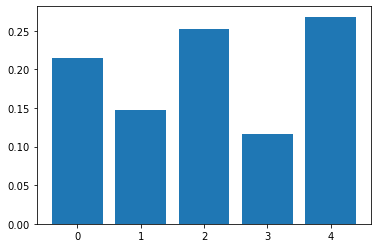

In [228]:
import matplotlib.pyplot as plt
num_list = [0.21543465,0.14755908,0.25204254,0.11661939,0.26834434]  
plt.bar(range(len(num_list)), num_list)  
plt.show()

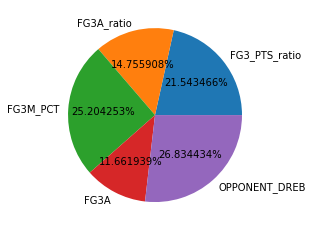

In [229]:
labels ='FG3_PTS_ratio', 'FG3A_ratio', 'FG3M_PCT', 'FG3A', 'OPPONENT_DREB'
fraces = [0.21543465,0.14755908,0.25204254,0.11661939,0.26834434]
plt.pie(x=fraces,labels= labels)
plt.axes(aspect=1)
plt.pie(x=fraces,labels= labels,autopct='%0f%%')
plt.show()